In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vec_length = 4096

sinc_sample_locations = np.arange(-np.pi*4/2.0, np.pi*4/2.0, np.pi/vec_length)
sinc = np.sinc(sinc_sample_locations/np.pi)
custom_window = sinc*np.hamming(4*vec_length)

pow_spec_fft = np.zeros(int(vec_length/2)+1)
pow_spec_pfb = np.zeros(int(vec_length/2)+1)

N_seconds = 1000

t = np.linspace(0,N_seconds,vec_length*N_seconds)
inp_data = np.random.normal(0,0.1,len(t)) + np.sin(100.125785*2*np.pi*t)

In [3]:
# sig_1 = custom_window[0*vec_length:1*vec_length]
# sig_2 = custom_window[1*vec_length:2*vec_length]
# sig_3 = custom_window[2*vec_length:3*vec_length]
# sig_4 = custom_window[3*vec_length:4*vec_length]

# sig_full = sig_1+sig_2+sig_3+sig_4

# # plt.figure(figsize=(16,9))
# # plt.semilogy(np.abs(np.fft.fftshift(np.fft.fft(sig_full)))[2000:2096])
# plt.figure()
# plt.plot(sig_full)

In [4]:
for i in range(N_seconds-8):
    sig_1 = inp_data[(i+0)*vec_length:(i+1)*vec_length]*custom_window[0*vec_length:1*vec_length]
    sig_2 = inp_data[(i+1)*vec_length:(i+2)*vec_length]*custom_window[1*vec_length:2*vec_length]
    sig_3 = inp_data[(i+2)*vec_length:(i+3)*vec_length]*custom_window[2*vec_length:3*vec_length]
    sig_4 = inp_data[(i+3)*vec_length:(i+4)*vec_length]*custom_window[3*vec_length:4*vec_length]

    sig_full = sig_1+sig_2+sig_3+sig_4

    pow_spec_pfb = pow_spec_pfb + (np.abs(np.fft.rfft(sig_full)))**2
    pow_spec_fft = pow_spec_fft + (np.abs(np.fft.rfft(inp_data[(i+0)*vec_length:(i+1)*vec_length])))**2


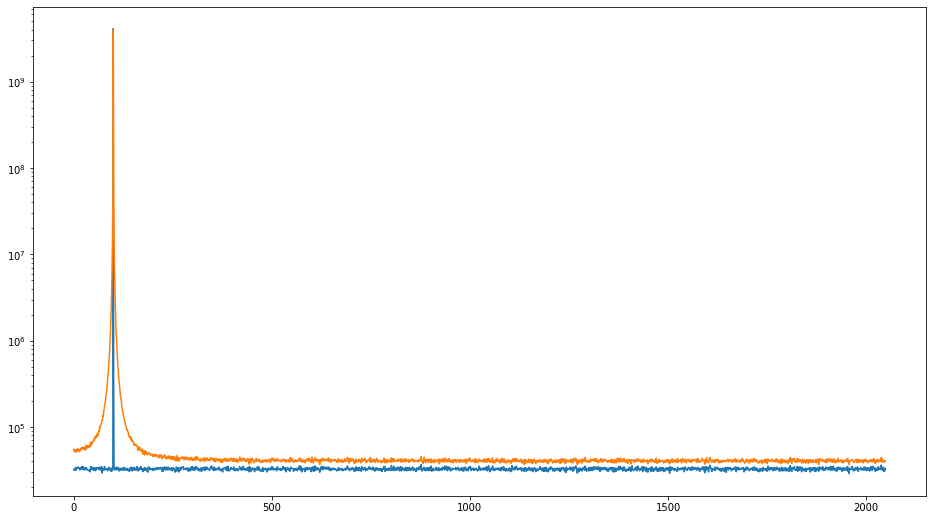

In [5]:
plt.figure(figsize=(16,9))
plt.semilogy(pow_spec_pfb)
plt.semilogy(pow_spec_fft)